In [26]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import numpy as np
import sys
import pandas as pd
import pickle
from scipy import stats


from Doublet_Quantifier.curvefit import *
from Doublet_Quantifier.models import *


In [27]:
sys.path.append('/Users/allybaldelli/Desktop/AMNH-stuff/quantifying_clouds_ally/functions')
from plotting_tools import *

In [28]:
mypath = '/Users/allybaldelli/Desktop/AMNH-stuff/quantifying_clouds_ally/'
dfs = []
temps = [1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400]

for temp in temps:
    with open(mypath + "diamondback-data/pickle_files/parameters/t"+ str(temp) + "_parameter_df.pkl", "rb") as f:
        df = pickle.load(f)
        df["temp"] = temp * np.ones(len(df))
        dfs.append(df[df['clouds'] != 10].copy(deep=False).reset_index(drop=True))

master_df = pd.concat(dfs, ignore_index=True)
[T1400, T1500, T1600, T1700, T1800, T1900, T2000, T2100, T2200, T2300, T2400] = dfs

del df

In [29]:
# lists of values 

gravities = [3.5, 4.0, 4.5, 5.0, 5.5]
clouds = [1,2,3,4,8]


In [77]:
# Fili15 spectral type to temperature conversion
# integer values 6-29 correspond to spectral types M6-T9
# L0:10, L1:11, L2:12, L3:13, L4:14, L5:15, L6:16, L7:17, L8:18, L9:19
Teff = lambda x: 4.747e3 -7.005e2*x + 1.155e2*(x**2) - 1.191e1*(x**3) +6.318e-1*(x**4) -1.606e-2*(x**5) +1.546e-4*(x**6)


In [103]:
Teff(9)

2394.683638600001

In [100]:
# defing the colors and colorbars for the logg and temp values 
logg_num = [3.5, 4, 4.5, 5, 5.5]
logg_ticks = ['Less dense', '4', '4.5', '5', 'More dense']
logg_bounds = [3.25, 3.75, 4.25, 4.75, 5.25, 5.75]

temp_num =   [1350,  1400,  1482,   1600,  1700,  1800, 1960,   2000,   2200,  2248,  2400]
temp_ticks = ["L8", '1400', "L6,", '1600', 'L4', '1800', "L2", '2000', '2200', "L0", '2400']
temp_bounds = [1350, 1450, 1550, 1650, 1750, 1850, 1950, 2050, 2150, 2250, 2350, 2450]

bw_cmap = plt.cm.binary
norm_bw = mpl.colors.BoundaryNorm(logg_bounds, logg_colors.N, extend='neither')


rainbow = plt.cm.rainbow
norm_temp = mpl.colors.BoundaryNorm(temp_bounds, rainbow.N, extend='neither')

def logg_bw_colorbar(fig, cax = None, ax = None, orientation='vertical',
                  shrink=1.0, aspect=20, pad=.14):

    return fig.colorbar(pl.cm.ScalarMappable(norm=norm_bw, cmap=bw_cmap),
                cax=cax, ax = ax, orientation= orientation,
                ticks=logg_num,  format=mticker.FixedFormatter(logg_ticks),
                extend='neither', spacing='proportional',
                shrink=shrink, aspect=aspect, pad=pad)



def temp_colorbar(fig, cax = None, ax = None, orientation='vertical',
                  shrink=1.0, aspect=20, pad=.14):

    return fig.colorbar(pl.cm.ScalarMappable(norm=norm_temp, cmap=rainbow),
                cax=cax, ax = ax, orientation= orientation,
                ticks=temp_num,  format=mticker.FixedFormatter(temp_ticks),
                extend='neither', spacing='proportional',
                shrink=shrink, aspect=aspect, pad=pad)

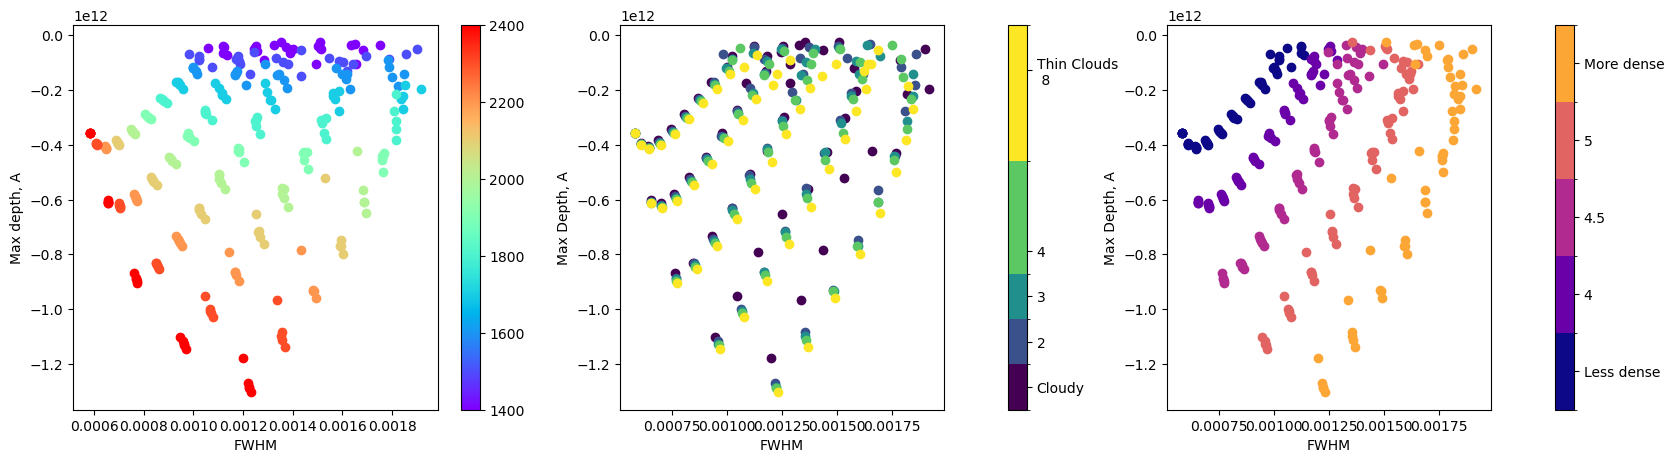

In [31]:
fig, axs = plt.subplots(1, 3, figsize = (20, 5))
ax1, ax2, ax3 = axs


# colored by temperature
cmap = plt.cm.rainbow
norm = mcolors.Normalize(vmin=min(temps), vmax=max(temps))


for temp in temps:
    mask = master_df['temp'] == temp
    # mask = mask & (master_df['logg'] >= 4) & (master_df['logg'] <= 5)
    #mask = mask & (master_df['clouds'] <= 3)
    color = cmap(norm(temp))
    
    ax1.scatter( (master_df[mask]['FWHM1'] + master_df[mask]['FWHM2'])/2, 
               (master_df[mask]['A1'] + master_df[mask]['A2'])/2,
                color = color)
    
ax1.set_xlabel('FWHM')
ax1.set_ylabel('Max depth, A')
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax1)


# colored by fsed
for fsed in clouds:
    mask = round(master_df['clouds'], 1) == fsed
    mask = mask & (master_df['temp'] >= 1300) & (master_df['logg'] <= 2400)
    color = fsed_colors(norm_f(fsed))
    
    ax2.scatter( (master_df[mask]['FWHM1'] + master_df[mask]['FWHM2'])/2, 
               (master_df[mask]['A1'] + master_df[mask]['A2'])/2,
                color = color)
    
    
ax2.set_xlabel('FWHM')
ax2.set_ylabel('Max Depth, A')
fsed_colorbar(fig, ax = ax2)



# colored by logg
for g in gravities:
    mask = round(master_df['logg'], 1) == g
    mask = mask & (master_df['temp'] >= 1300) & (master_df['logg'] <= 2400)
    color = logg_colors(norm_g(g))
    
    ax3.scatter( (master_df[mask]['FWHM1'] + master_df[mask]['FWHM2'])/2, 
               (master_df[mask]['A1'] + master_df[mask]['A2'])/2,
                color = color)
    
ax3.set_xlabel('FWHM')
ax3.set_ylabel('Max Depth, A')

logg_colorbar(fig, ax = ax3)

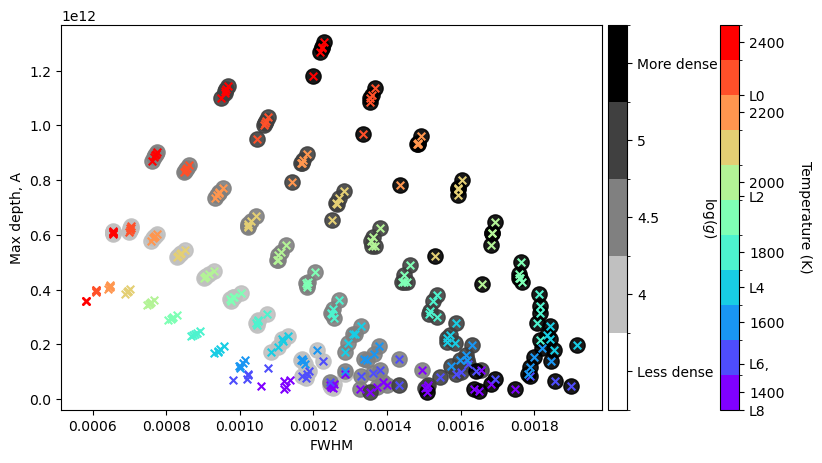

In [101]:

fig, ax = plt.subplots(figsize = (10, 5))

for g in gravities:
    mask = round(master_df['logg'], 1) == g
    mask = mask & (master_df['temp'] >= 1400) & (master_df['logg'] <= 2400)
    color = bw_cmap(norm_bw(g))
    
    ax.scatter( (master_df[mask]['FWHM1'] + master_df[mask]['FWHM2'])/2, 
               -(master_df[mask]['A1'] + master_df[mask]['A2'])/2,
                color = color, s=120, alpha = .9)
    

for temp in temps:
    mask = master_df['temp'] == temp
    # mask = mask & (master_df['logg'] >= 4) & (master_df['logg'] <= 5)
    #mask = mask & (master_df['clouds'] <= 3)
    color = rainbow(norm_temp(temp))
    ax.scatter( (master_df[mask]['FWHM1'] + master_df[mask]['FWHM2'])/2, 
                - (master_df[mask]['A1'] + master_df[mask]['A2'])/2,
                    color = color, alpha = 1, s=30, marker = 'x')
        
        
ax.set_xlabel('FWHM')
ax.set_ylabel('Max depth, A')

temp_cb = temp_colorbar(fig, ax = ax, pad = .02)
temp_cb.set_label('Temperature (K)', rotation = -90, labelpad=20)

bw_cb = logg_bw_colorbar(fig, ax = ax, pad = .01)
bw_cb.set_label(r'$\log(g)$', fontsize=10, rotation = -90, labelpad=0) 

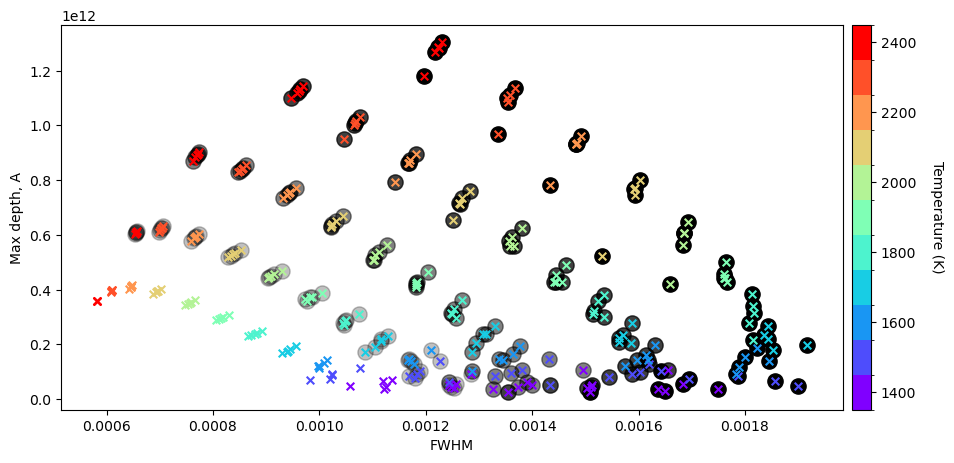

In [64]:

fig, ax = plt.subplots(figsize = (12, 5))

for g in gravities:
    mask = round(master_df['logg'], 1) == g
    mask = mask & (master_df['temp'] >= 1400) & (master_df['logg'] <= 2400)
    color = bw_cmap(norm_bw(g))
    alpha = norm_bw(g) / 255
    ax.scatter( (master_df[mask]['FWHM1'] + master_df[mask]['FWHM2'])/2, 
               -(master_df[mask]['A1'] + master_df[mask]['A2'])/2,
                color = 'k' , s=120, alpha = alpha)
    

for temp in temps:
    mask = master_df['temp'] == temp
    # mask = mask & (master_df['logg'] >= 4) & (master_df['logg'] <= 5)
    #mask = mask & (master_df['clouds'] <= 3)
    color = rainbow(norm_temp(temp))
    ax.scatter( (master_df[mask]['FWHM1'] + master_df[mask]['FWHM2'])/2, 
                - (master_df[mask]['A1'] + master_df[mask]['A2'])/2,
                    color = color, alpha = 1, s=30, marker = 'x')
        
        
ax.set_xlabel('FWHM')
ax.set_ylabel('Max depth, A')

temp_cb = temp_colorbar(fig, ax = ax, pad = .01)
temp_cb.set_label('Temperature (K)', rotation = -90, labelpad=20)


In [73]:
# Fili15 spectral type to temperature conversion
# integer values 6-29 correspond to spectral types M6-T9
# L0:10, L1:11, L2:12, L3:13, L4:14, L5:15, L6:16, L7:17, L8:18, L9:19
Teff = lambda x: 4.747e3 -7.005e2*x + 1.155e2*(x**2) - 1.191e1*(x**3) +6.318e-1*(x**4) -1.606e-2*(x**5) +1.546e-4*(x**6)



In [76]:
Teff(9)


2394.683638600001